# Chapter 4: A Distribution Network with Capacities

In the preceeding chapters we assumes an unlimited capacity which is not the case in reality. This chapter shows how to enhance your model with capacities. Here we assume that warehouse in New Orleans has a limit capacity of handling just 8 pallets, but one at NewYork 14 pallets. What will change in the model?

There are two ways of bringing capacities into a model: either by a defining a capacity by Capacity() or by assigning a capacity be capacity(). The first one (uppercase) is a creation of an object of class Capacity, where the second one (lowercase ) is excecutung a method of class Net(). 

In our model we use both: the first one in section Capacities(), the second one section "Conversion Costs".

All other parts are identical to chapter 3 and the updated chart is shown in section "Excecute the Net" below.

<div>
<img src="attachment:image.png" width="700" style="float:left">
</div>

# Locations

In [1]:
globals().clear(); import aitpath; 
from sunflow import SupplyNet,Logistics,Customer,Location,Freight,Producer, Capacity

Europe      = Location('Europe')         # the Winery
New_York    = Location('New York')       # warehouse
New_Orleans = Location('New Orleans')    # warehouse
StLouis     = Location('StLouis')        # customer

# Freight Costs

In [2]:
Freight(Europe,       New_York,      2500/20 )
Freight(Europe,       New_Orleans,   2900/20 )
Freight(New_York,     StLouis,       1200/20 )
Freight(New_Orleans,  StLouis,        820/20 )
print()

# Capacities

In [3]:
New_York_WH_capa = Capacity('New York', 14 )

# Producers, Customers, Logistics

Capacity constraints can be applied at the time of a nodes declaration (here) or as an attachment to a net structure (see section Conversion Costs). 

In [4]:
Winery          = Producer('Winery')          .at(Europe)
New_York_WH     = Logistics('New York WH')    .at(New_York)    .capacity(New_York_WH_capa)
New_Orleans_WH  = Logistics('New_Orleans WH') .at(New_Orleans)
Walmart         = Customer('Walmart')         .at(StLouis)

# Create a new Net¶

In [5]:
net = SupplyNet('Chapter 2 Distribution USA').display(0)

# Build the Net

In [6]:
winery = net.source().n(' ').by(Winery)  

# Conversion Costs

Here you find the second capacity constraint.

In [7]:
new_york    = net.distribution(winery).n(' ')  .by(New_York_WH)     .varcost(4)  #.capacity(New_York_WH_capa)
new_orleans = net.distribution(winery).n(' ')  .by(New_Orleans_WH)  .varcost(2)  .capacity(8)

In [8]:
walmart = net.delivery(new_york, new_orleans).n(' ') .at(Walmart) .demand(20)

# Compile and Graph the Net

In [9]:
net.compile()

# Execute the Net

In [10]:
net.execute().showGraph(orient='BT').view()


<div>
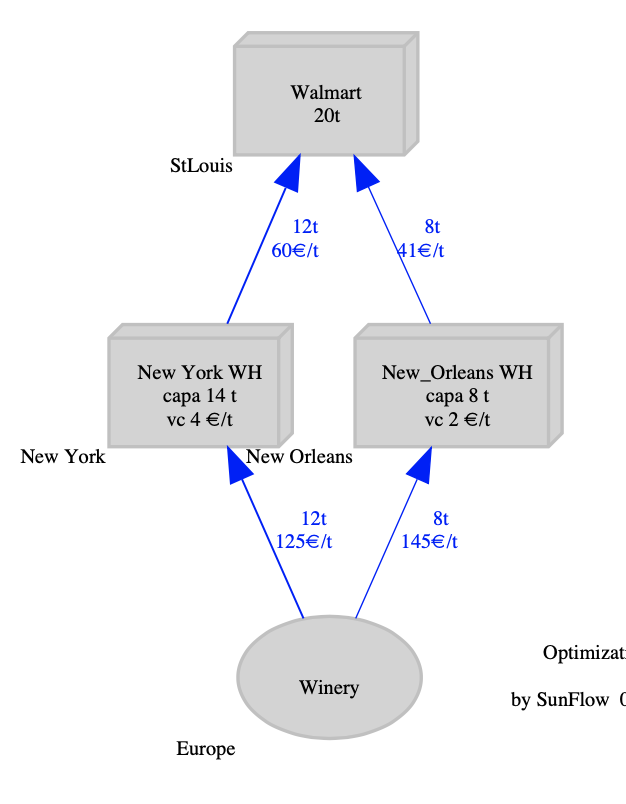
</div>

Now, with the capacity contraints, only 8 pallets are flowing through New Orleans, the remaining are send through New York.